# Correlation between cryptocurrencies [BTC, ETH, XRP] 2017-2018

### Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

### Gives a float number from this format "1,2366.223". Like "1,235.21" to 1235.21 

In [2]:
float_format = lambda x: float(x.replace(',', ''))

## Read data 

In [3]:
df_btc = pd.read_csv('BTC.csv', index_col='Date').loc[::-1]

In [4]:
df_eth = pd.read_csv('ETH.csv', index_col='Date').loc[::-1]

In [5]:
df_xrp = pd.read_csv('XRP.csv', index_col='Date').loc[::-1]

In [6]:
print(df_xrp.head(),'\n\nShape:', df_xrp.shape)

                Price     Open     High      Low     Vol. Change %
Date                                                              
Jan 01, 2017  0.00635  0.00651  0.00660  0.00626  189.01K   -2.53%
Jan 02, 2017  0.00631  0.00635  0.00642  0.00621  554.90K   -0.54%
Jan 03, 2017  0.00641  0.00631  0.00657  0.00622    1.82M    1.57%
Jan 04, 2017  0.00641  0.00641  0.00684  0.00637  888.03K    0.00%
Jan 05, 2017  0.00628  0.00641  0.00689  0.00565    9.61M   -2.09% 

Shape: (517, 6)


In [7]:
print(df_eth.head(),'\n\nShape:', df_eth.shape)

              Price   Open   High   Low     Vol. Change %
Date                                                     
Jan 01, 2017   8.20   8.17   8.59  8.03   41.41K    2.50%
Jan 02, 2017   8.37   8.19   8.50  8.11   28.93K    2.07%
Jan 03, 2017   9.74   8.43   9.90  8.30  172.41K   16.37%
Jan 04, 2017  11.00   9.57  11.10  9.44  158.93K   12.94%
Jan 05, 2017  10.15  11.16  11.70  9.20  140.18K   -7.73% 

Shape: (517, 6)


In [8]:
print(df_btc.head(),'\n\nShape:', df_btc.shape)

                 Price      Open      High       Low    Vol. Change %
Date                                                                 
Jan 01, 2017    998.99    966.58  1,006.50    961.26  13.44K    3.35%
Jan 02, 2017  1,019.30    999.24  1,034.80    997.30  21.82K    2.03%
Jan 03, 2017  1,037.50  1,019.30  1,038.70  1,013.50  14.11K    1.79%
Jan 04, 2017  1,139.60  1,037.50  1,150.00  1,036.40  53.73K    9.84%
Jan 05, 2017  1,003.20  1,139.80  1,166.00    865.38  91.20K  -11.97% 

Shape: (517, 6)


## Get float format for 'Price' column 

In [9]:
eth_price = df_eth['Price'].apply(float_format)

In [10]:
btc_price = df_btc['Price'].apply(float_format)

# Correlation Plots

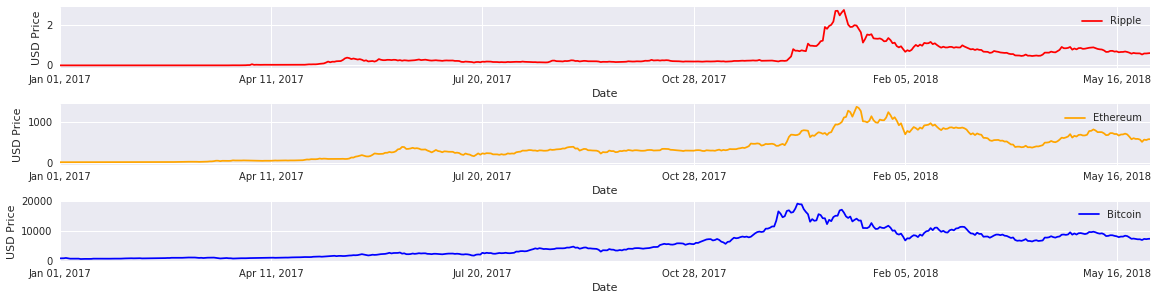

In [73]:
labels = ['Ripple', 'Ethereum', 'Bitcoin']
frames = [df_xrp['Price'], eth_price, btc_price]
colors = ['red', 'orange', 'blue']

plt.figure(figsize=(16, 4))

for k in range(len(frames)):
    plt.subplot(3, 1, k+1)
    frames[k].plot(label=labels[k], color=colors[k])
    plt.legend()
    plt.ylabel('USD Price')
plt.tight_layout(pad=0.1)
plt.show()


## Linear Regression for each one

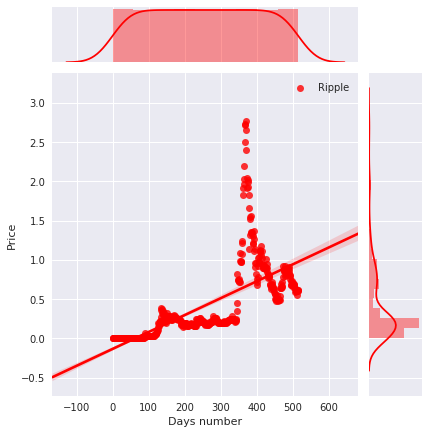

In [12]:
sns.jointplot(np.arange(len(df_xrp)), df_xrp.Price, kind='reg', color=colors[0], label='Ripple')
plt.legend()
plt.xlabel('Days number')
plt.show()

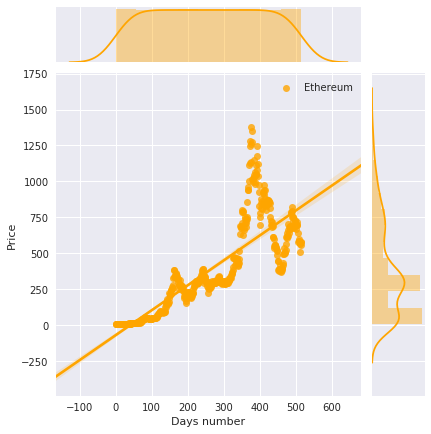

In [13]:
sns.jointplot(np.arange(len(df_eth)), eth_price, kind='reg', color=colors[1], label='Ethereum')
plt.legend()
plt.xlabel('Days number')
plt.show()

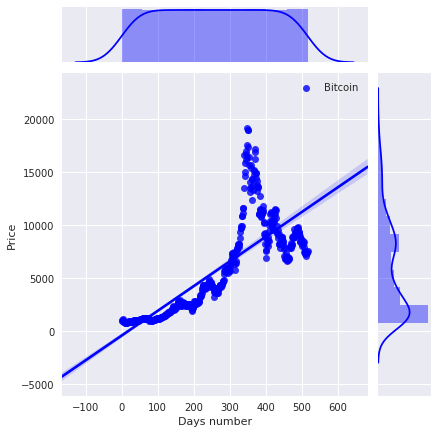

In [14]:
sns.jointplot(np.arange(len(df_btc)), btc_price, kind='reg', color=colors[2], label='Bitcoin')
plt.legend()
plt.xlabel('Days number')
plt.show()

## Correlation table

In [88]:
df_prices = pd.DataFrame({'Ripple': df_xrp['Price'], 'Ethereum': eth_price, 'Bitcoin': btc_price})

In [93]:
pearson_correlation = df_prices.corr()

In [94]:
pearson_correlation

,Bitcoin,Ethereum,Ripple
Bitcoin,1.000000,0.872591,0.792182
Ethereum,0.872591,1.000000,0.890144
Ripple,0.792182,0.890144,1.000000


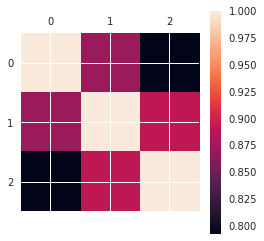

In [105]:
plt.matshow(pearson_correlation)
plt.colorbar()
plt.show()